In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置全局字体为中文字体，比如宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示为方块的问题

folder_path = "ORL_Faces"


In [2]:
pictures = []  # 用来进行可视化操作的人脸（10张不同人的）
i = 0
# 遍历每个人的文件夹
for person_folder in os.listdir(folder_path):
    person_folder_path = os.path.join(folder_path, person_folder)
    if i < 10:
        # 遍历该人员文件夹中的图像文件
        for image_file in os.listdir(person_folder_path):
            image_path = os.path.join(person_folder_path, image_file)
            
            # 读取第一张图像
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            img_array = img.flatten()
            pictures.append(img_array)
            
            # 只读取第一张图像后，跳出内层循环以读取下一个人员的图像
            break
        i = i + 1
pictures = np.array(pictures)        
pictures.shape

(10, 10304)

PCA

In [3]:

def load_images_1d(folder_path):
    """读取图像数据，并展平成一维"""
    X_train = []  # 训练集数据  (200,10304)
    y_train = []  # 训练集标签  (200,)
    X_test = []   
    y_test = []   
        
    for label, subfolder in enumerate(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        for i, image_file in enumerate(os.listdir(subfolder_path)):
            image_path = os.path.join(subfolder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image_array = image.flatten()
            
            if i < 5:
                X_train.append(image_array)
                y_train.append(label)
            else:
                X_test.append(image_array)
                y_test.append(label)
    
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)


X_train, y_train, X_test, y_test = load_images_1d(folder_path)

print("Training data shape: ", X_train.shape)
print("Testing data shape: ", y_train.shape)

Training data shape:  (200, 10304)
Testing data shape:  (200,)


best dimension: 45


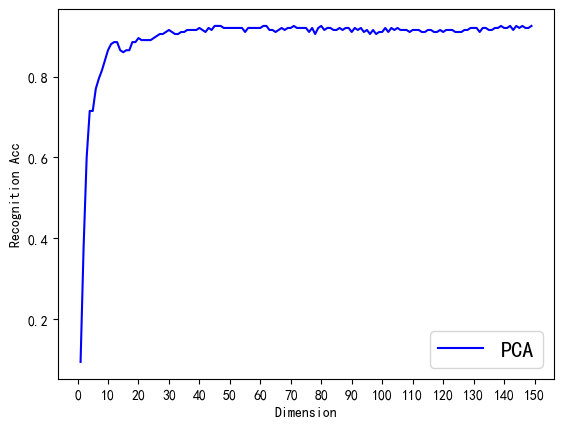

In [4]:
pca_acc = []
for i in range(1,150):
    # 使用PCA进行降维 重构 
    pca = PCA(n_components=i)  
    X_train_pca = pca.fit_transform(X_train) # 用训练集训练
    X_test_pca = pca.transform(X_test)  # 测试集降维

    X_train_pca = pca.inverse_transform(X_train_pca)  # 重构
    X_test_pca = pca.inverse_transform(X_test_pca)
    #print(X_train_pca.shape)

    # KNN分类器
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train_pca, y_train)

    train_pred = knn.predict(X_train_pca)  # 预测
    test_pred = knn.predict(X_test_pca)

    train_accuracy = accuracy_score(y_train, train_pred)  # 计算分类准确率
    test_accuracy = accuracy_score(y_test, test_pred)
    pca_acc.append(test_accuracy)
    
print('best dimension:',pca_acc.index(max(pca_acc))+1)

plt.plot(range(1,150), pca_acc, color='b', linestyle='-', label='PCA')
plt.xticks([i*10 for i in range(0,16)])
plt.xlabel('Dimension')  
plt.ylabel('Recognition Acc') 
plt.legend(loc='lower right', prop={'size': 16})
plt.show() 


In [5]:
# 使用PCA进行降维 重构
pca = PCA(n_components=pca_acc.index(max(pca_acc))+1) 
X_train_pca = pca.fit_transform(X_train) # 用训练集训练
X_test_pca = pca.transform(X_test)  # 测试集降维

X_train_pca = pca.inverse_transform(X_train_pca)  # 重构
X_test_pca = pca.inverse_transform(X_test_pca)
print(X_train_pca.shape)

# KNN分类器
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)

train_pred = knn.predict(X_train_pca)  # 预测
test_pred = knn.predict(X_test_pca)

train_accuracy = accuracy_score(y_train, train_pred)  # 计算分类准确率
test_accuracy = accuracy_score(y_test, test_pred)

print("Training accuracy: ", train_accuracy)
print("Testing accuracy: ", test_accuracy)

(200, 10304)
Training accuracy:  1.0
Testing accuracy:  0.92


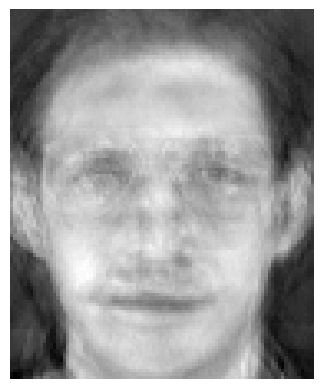

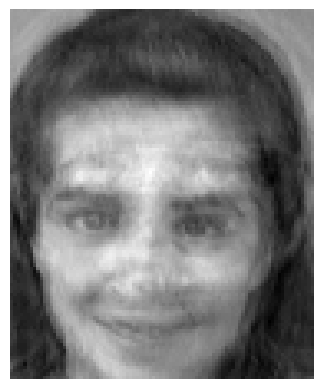

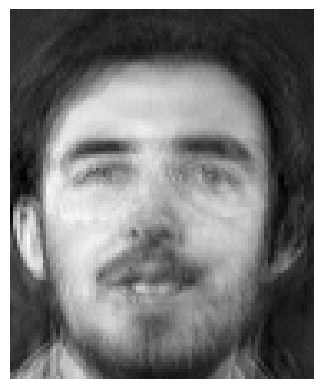

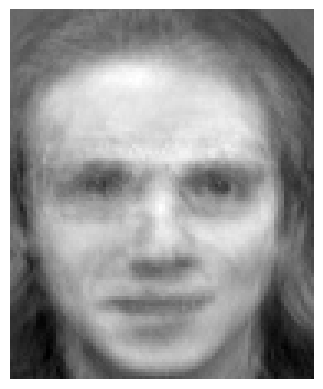

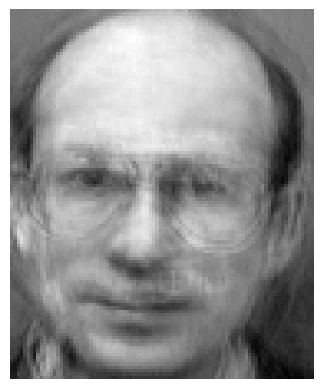

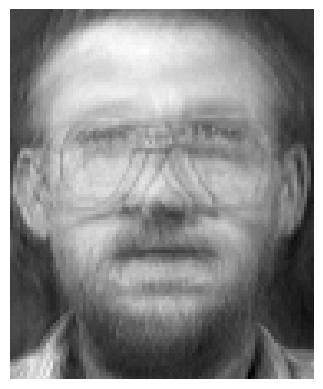

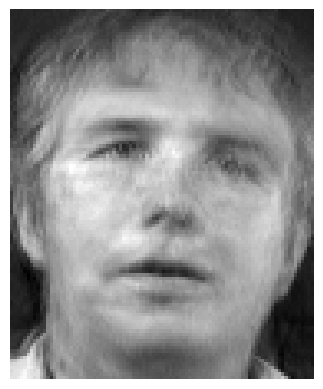

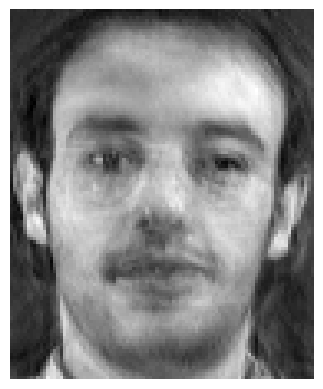

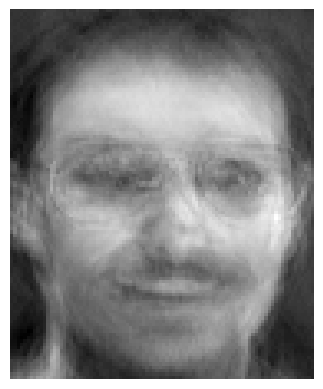

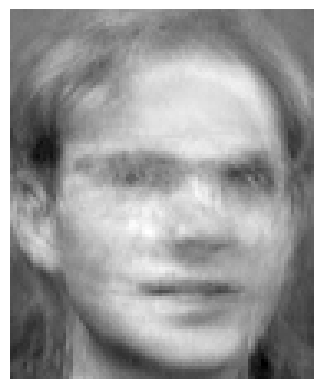

In [6]:
# 使用PCA降维重构后的人脸
pictures_pca = pca.transform(pictures)
pictures_pca = pca.inverse_transform(pictures_pca)
pictures_pca = pictures_pca.reshape(10,112,92)
for i in range(10):
    plt.imshow(pictures_pca[i], cmap='gray')
    plt.axis('off')
    plt.show()

2D PCA

In [7]:
def load_images_2d(folder_path):
    """读取图片的二维数据"""
    X_train = []  
    y_train = []  
    X_test = []   
    y_test = []   
        
    for label, subfolder in enumerate(os.listdir(folder_path)):
        subfolder_path = os.path.join(folder_path, subfolder)
        
        for i, image_file in enumerate(os.listdir(subfolder_path)):
            image_path = os.path.join(subfolder_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            if i < 5:
                X_train.append(image)
                y_train.append(label)
            else:
                X_test.append(image)
                y_test.append(label)
    
    return np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

X_train, y_train, X_test, y_test = load_images_2d(folder_path)
print(X_train.shape)
print(y_train.shape)

(200, 112, 92)
(200,)


In [8]:
def PCA2D(samples, row_top):
    '''samples are 2d matrices
            返回特征向量矩阵'''
    size = samples[0].shape
    mean = np.zeros(size)
    #将归一化后的所有图片对应位置像素相加
    for s in samples:
        mean = mean + s

    #取得归一化后的所有图片对应位置像素相加之后的均值
    mean /= float(len(samples))

    #将图片的长为新生方阵的n
    cov_row = np.zeros((size[1],size[1]))
    for s in samples:
        #每张图片减去所有图片的均值
        diff = s - mean
        #生成协方差矩阵
        cov_row = cov_row + np.dot(diff.T, diff)
    cov_row /= float(len(samples))

    # 返回协方差矩阵特征值与特征向量
    row_eval, row_evec = np.linalg.eig(cov_row)
    # 将特征值从小到大排列，并将索引赋值给sorted_index
    sorted_index = np.argsort(row_eval)
    #利用切片操作反转
    # sorted_index[:-row_top-1 : -1] 取后row_top个也即为特征值从大到小前row_top个特征向量
    X = row_evec[:,sorted_index[:-row_top-1 : -1]]
    return X

best dimension: 2


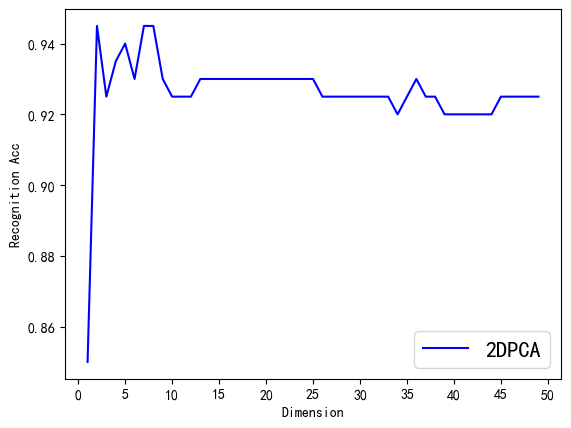

In [9]:
pca_2d_acc = []
for i in range(1,50):
    X = PCA2D(X_train, i)

    X_train_2dpca = []
    X_test_2dpca = []
    for i in range(len(X_test)):
        res = np.dot(np.dot(X_test[i], X), X.T)  # 对测试集降维 重构
        X_test_2dpca.append(res)

    for i in range(len(X_train)):
        res = np.dot(np.dot(X_train[i], X), X.T)  # 对训练集降维 重构
        X_train_2dpca.append(res)
        
    X_train_2dpca = np.array(X_train_2dpca).reshape(200, -1)
    X_test_2dpca = np.array(X_test_2dpca).reshape(200, -1)

    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train_2dpca, y_train)

    train_pred = knn.predict(X_train_2dpca)
    test_pred = knn.predict(X_test_2dpca)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    pca_2d_acc.append(test_accuracy)
    
print('best dimension:', pca_2d_acc.index(max(pca_2d_acc))+1)

plt.plot(range(1,50), pca_2d_acc, color='b', linestyle='-', label='2DPCA')
plt.xticks([i*5 for i in range(0,11)])
plt.xlabel('Dimension')  
plt.ylabel('Recognition Acc') 
plt.legend(loc='lower right', prop={'size': 16})
plt.show() 
# print("Training accuracy: ", train_accuracy)
# print("Testing accuracy: ", test_accuracy)


In [10]:
X = PCA2D(X_train, pca_2d_acc.index(max(pca_2d_acc))+1)

X_train_2dpca = []
X_test_2dpca = []
for i in range(len(X_test)):
    res = np.dot(np.dot(X_test[i], X), X.T)  # 对测试集降维
    X_test_2dpca.append(res)

for i in range(len(X_train)):
    res = np.dot(np.dot(X_train[i], X), X.T)  # 对训练集降维
    X_train_2dpca.append(res)
    
X_train_2dpca = np.array(X_train_2dpca).reshape(200, -1)
X_test_2dpca = np.array(X_test_2dpca).reshape(200, -1)

print(X_train_2dpca.shape)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_2dpca, y_train)

train_pred = knn.predict(X_train_2dpca)
test_pred = knn.predict(X_test_2dpca)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training accuracy: ", train_accuracy)
print("Testing accuracy: ", test_accuracy)

(200, 10304)
Training accuracy:  1.0
Testing accuracy:  0.945


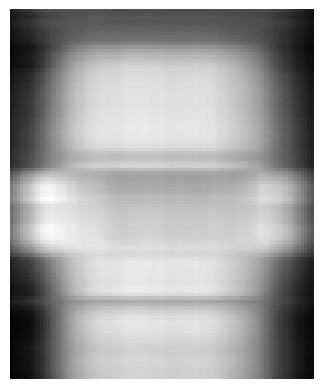

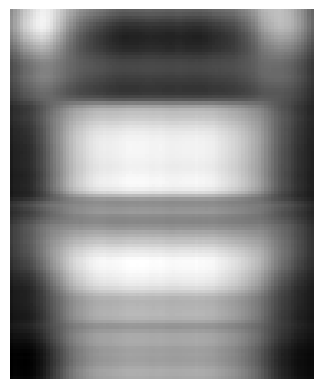

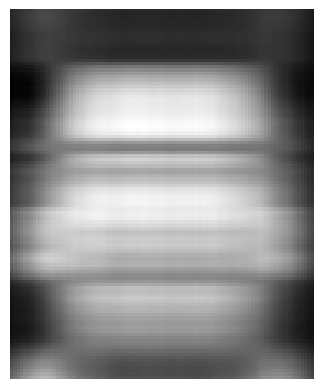

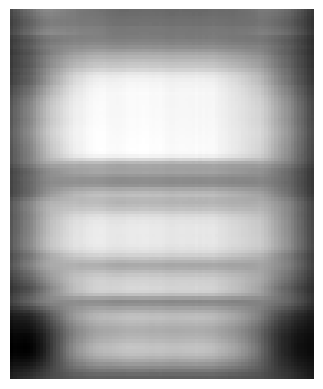

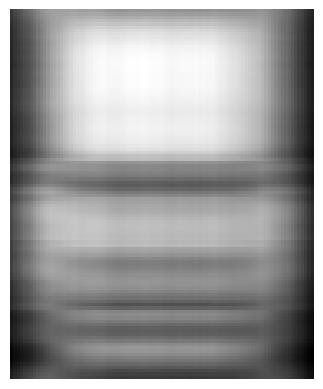

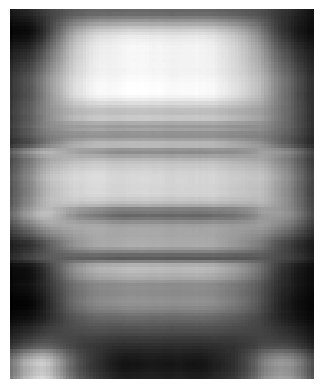

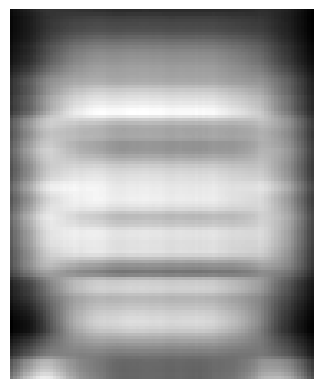

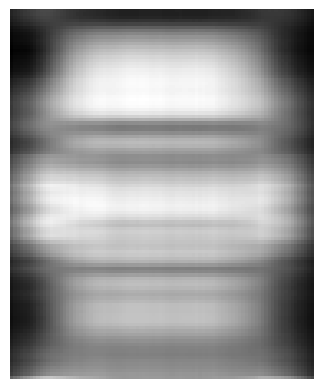

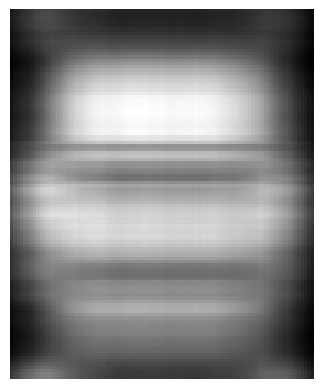

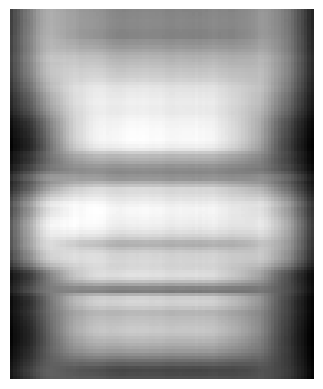

In [11]:
pictures = pictures.reshape(10,112,92)
pictures_2dpca = []
for i in range(len(pictures)):
    res = np.dot(np.dot(pictures[i], X), X.T)  # 对测试集降维
    pictures_2dpca.append(res)
for i in range(10):
    plt.imshow(pictures_2dpca[i], cmap='gray')
    plt.axis('off')
    plt.show()

Alternative 2DPCA

In [12]:
def aPCA2D(samples,col_top):
    size = samples[0].shape
    # m*n matrix
    mean = np.zeros(size)
    #将归一化后的所有图片对应位置像素相加
    for s in samples:
        mean = mean + s

    #取得归一化后的所有图片对应位置像素相加之后的均值
    mean /= float(len(samples))

    # 将图片的宽为新生方阵的m
    cov_col = np.zeros((size[0], size[0]))
    for s in samples:
        diff = s - mean
        cov_col += np.dot(diff,diff.T)
    cov_col /= float(len(samples))
    
    col_eval, col_evec = np.linalg.eig(cov_col)
    sorted_index = np.argsort(col_eval)
    Z = col_evec[:,sorted_index[:-col_top-1 : -1]]
    return Z

best dimension: 9


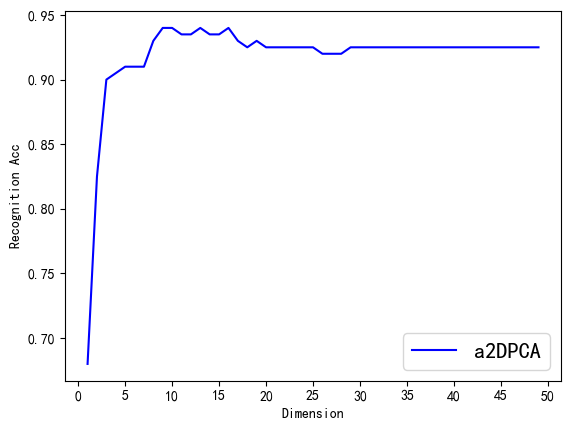

In [13]:
pca_a2d_acc = []
for i in range(1,50):
    Z = aPCA2D(X_train, i)

    X_train_a2dpca = []
    X_test_a2dpca = []
    for i in range(len(X_test)):
        res = np.dot(Z, np.dot(Z.T, X_test[i]))  # 对测试集降维
        X_test_a2dpca.append(res)

    for i in range(len(X_train)):
        res = np.dot(Z, np.dot(Z.T, X_train[i]))  # 对训练集降维
        X_train_a2dpca.append(res)
        
    X_train_a2dpca = np.array(X_train_a2dpca).reshape(200, -1)
    X_test_a2dpca = np.array(X_test_a2dpca).reshape(200, -1)

    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train_a2dpca, y_train)

    train_pred = knn.predict(X_train_a2dpca)
    test_pred = knn.predict(X_test_a2dpca)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    pca_a2d_acc.append(test_accuracy)

print('best dimension:', pca_a2d_acc.index(max(pca_a2d_acc))+1)

plt.plot(range(1,50), pca_a2d_acc, color='b', linestyle='-', label='a2DPCA')
plt.xticks([i*5 for i in range(0,11)])
plt.xlabel('Dimension')  
plt.ylabel('Recognition Acc') 
plt.legend(loc='lower right', prop={'size': 16})
plt.show() 
# print("Training accuracy: ", train_accuracy)
# print("Testing accuracy: ", test_accuracy)

In [14]:
Z = aPCA2D(X_train, pca_a2d_acc.index(max(pca_a2d_acc))+1)

X_train_a2dpca = []
X_test_a2dpca = []
for i in range(len(X_test)):
    res = np.dot(Z, np.dot(Z.T, X_test[i]))  # 对测试集降维
    X_test_a2dpca.append(res)

for i in range(len(X_train)):
    res = np.dot(Z, np.dot(Z.T, X_train[i]))  # 对训练集降维
    X_train_a2dpca.append(res)
    
X_train_a2dpca = np.array(X_train_a2dpca).reshape(200, -1)
X_test_a2dpca = np.array(X_test_a2dpca).reshape(200, -1)

print(X_train_a2dpca.shape)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_a2dpca, y_train)

train_pred = knn.predict(X_train_a2dpca)
test_pred = knn.predict(X_test_a2dpca)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training accuracy: ", train_accuracy)
print("Testing accuracy: ", test_accuracy)

(200, 10304)
Training accuracy:  1.0
Testing accuracy:  0.94


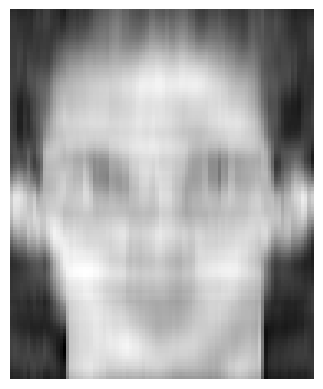

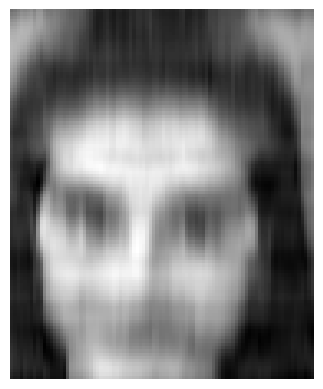

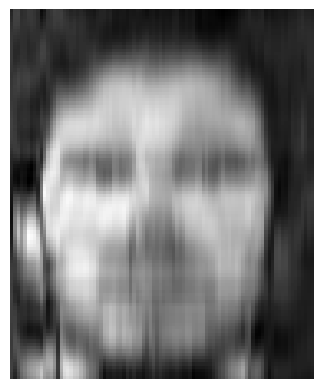

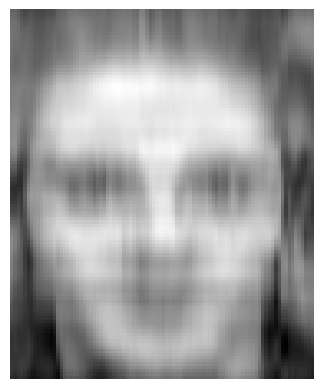

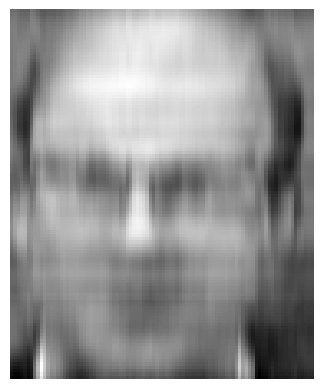

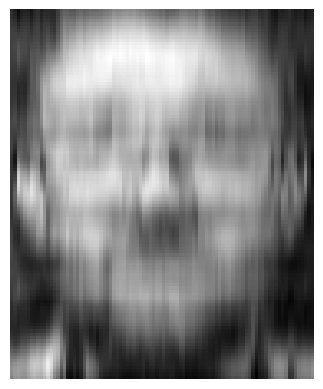

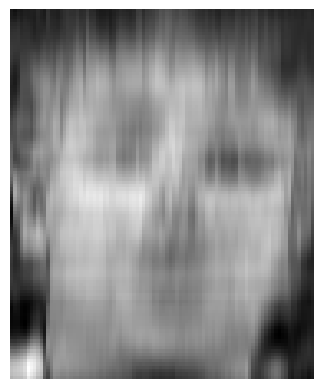

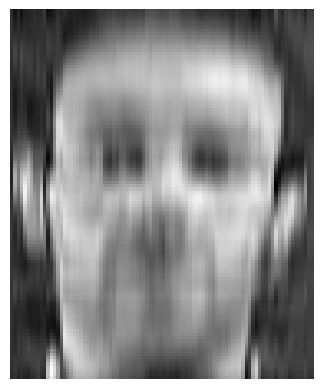

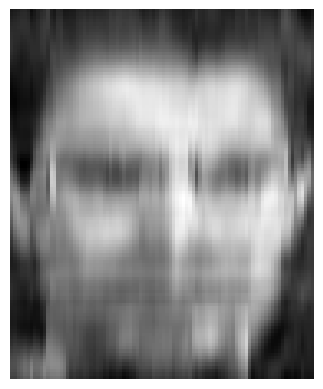

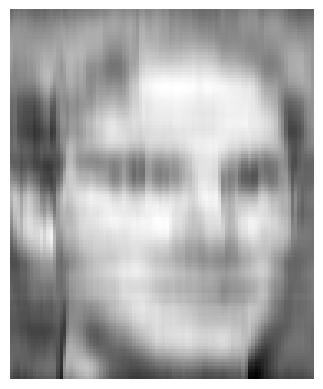

In [15]:
pictures_a2dpca = []
for i in range(len(pictures)):
    res = np.dot(Z, np.dot(Z.T, pictures[i]))  # 对测试集降维
    pictures_a2dpca.append(res)
for i in range(10):
    plt.imshow(pictures_a2dpca[i], cmap='gray')
    plt.axis('off')
    plt.show()

    (2D)^2 PCA

In [16]:
def PCA2D_2D(samples, row_top, col_top):
    '''samples are 2d matrices'''
    size = samples[0].shape
    # m*n matrix
    mean = np.zeros(size)
    #将归一化后的所有图片对应位置像素相加
    for s in samples:
        mean = mean + s

    #取得归一化后的所有图片对应位置像素相加之后的均值
    mean /= float(len(samples))

    #将图片的长为新生方阵的n
    cov_row = np.zeros((size[1],size[1]))
    for s in samples:
        #每张图片减去所有图片的均值
        diff = s - mean
        #生成协方差矩阵
        cov_row = cov_row + np.dot(diff.T, diff)
    cov_row /= float(len(samples))

    # 返回协方差矩阵特征值与特征向量
    row_eval, row_evec = np.linalg.eig(cov_row)
    # 将特征值从小到大排列，并将索引赋值给sorted_index
    sorted_index = np.argsort(row_eval)
    #利用切片操作反转
    # sorted_index[:-row_top-1 : -1] 取后90个也即为特征值从大到小前90个特征向量
    X = row_evec[:,sorted_index[:-row_top-1 : -1]]
    # 将图片的宽为新生方阵的m
    cov_col = np.zeros((size[0], size[0]))
    for s in samples:
        diff = s - mean
        cov_col += np.dot(diff,diff.T)
    cov_col /= float(len(samples))
    col_eval, col_evec = np.linalg.eig(cov_col)
    sorted_index = np.argsort(col_eval)
    Z = col_evec[:,sorted_index[:-col_top-1 : -1]]
    return X, Z

In [17]:
#X, Z = PCA2D_2D(X_train, 112, 50)
X_train_2d_2dpca = []
X_test_2d_2dpca = []
for i in range(len(X_test)):
    res = np.dot(np.dot(np.dot(Z, np.dot(Z.T, X_test[i])), X), X.T)  
    X_test_2d_2dpca.append(res)

for i in range(len(X_train)):
    res = np.dot(np.dot(np.dot(Z, np.dot(Z.T, X_train[i])), X), X.T) 
    X_train_2d_2dpca.append(res)
    
X_train_2d_2dpca = np.array(X_train_2d_2dpca).reshape(200, -1)
X_test_2d_2dpca = np.array(X_test_2d_2dpca).reshape(200, -1)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_2d_2dpca, y_train)

train_pred = knn.predict(X_train_2d_2dpca)
test_pred = knn.predict(X_test_2d_2dpca)

train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, test_pred)

print("Training accuracy: ", train_accuracy)
print("Testing accuracy: ", test_accuracy)

Training accuracy:  1.0
Testing accuracy:  0.94


(112, 92)


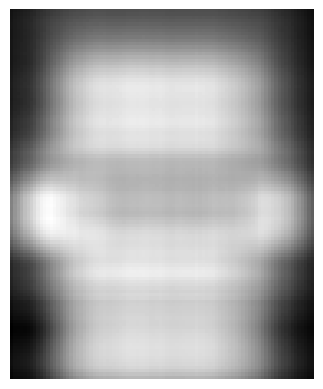

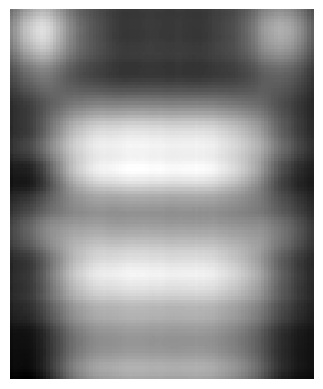

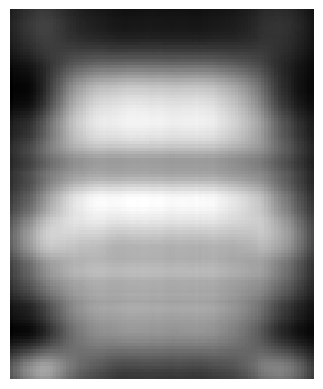

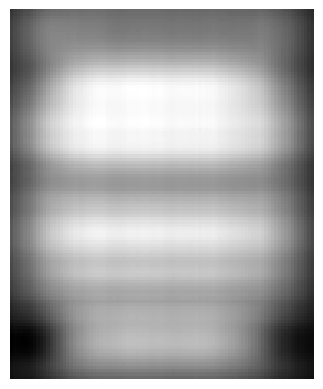

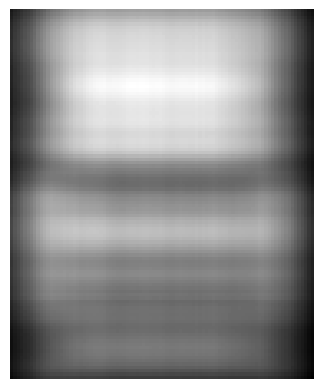

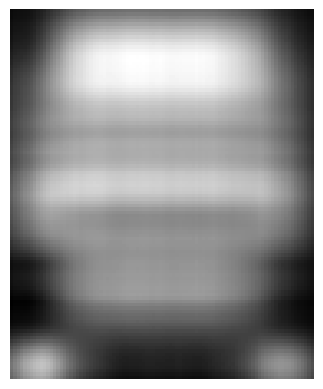

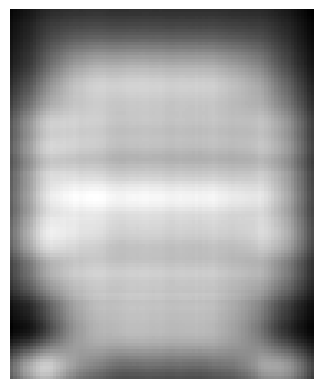

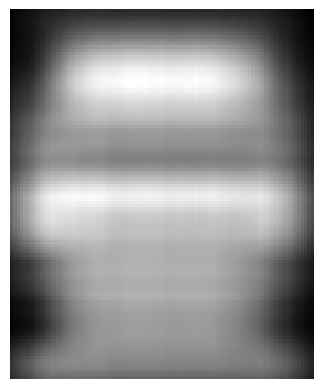

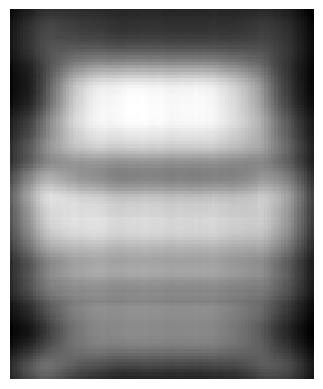

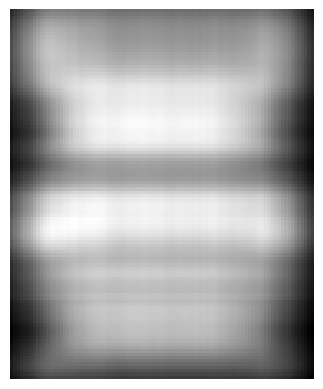

In [18]:
pictures_2d_2dpca = []
for i in range(len(pictures)):
    res = np.dot(np.dot(np.dot(Z, np.dot(Z.T, pictures[i])), X), X.T)  # 对测试集降维
    pictures_2d_2dpca.append(res)
print(pictures_2d_2dpca[1].shape)

for i in range(10):
    plt.imshow(pictures_2d_2dpca[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [19]:
# --------------------------------2DPCA  Vs  (2D)^2PCA  -------------------------------------

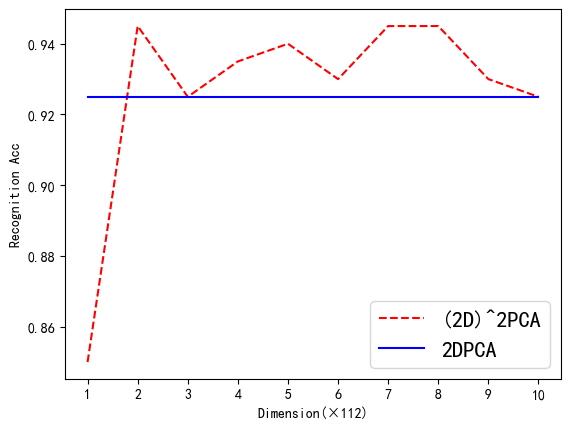

In [20]:
pca_2d2_acc = []
pca_2d_acc = []
X_train, y_train, X_test, y_test = load_images_2d(folder_path)

for i in range(1,11):
    # -----------(2D)^2PCA----------
    #X, Z = PCA2D_2D(X_train, i, 112)
    X = PCA2D(X_train, i)
    Z = aPCA2D(X_train, 112)
    X_train_2d_2dpca = []
    X_test_2d_2dpca = []
    for i in range(len(X_test)):
        res = np.dot(np.dot(np.dot(Z, np.dot(Z.T, X_test[i])), X), X.T)  # 对测试集降维
        X_test_2d_2dpca.append(res)

    for i in range(len(X_train)):
        res = np.dot(np.dot(np.dot(Z, np.dot(Z.T, X_train[i])), X), X.T)  # 对训练集降维
        X_train_2d_2dpca.append(res)
        
    X_train_2d_2dpca = np.array(X_train_2d_2dpca).reshape(200, -1)
    X_test_2d_2dpca = np.array(X_test_2d_2dpca).reshape(200, -1)
    
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train_2d_2dpca, y_train)

    test_pred = knn.predict(X_test_2d_2dpca)
    test_accuracy = accuracy_score(y_test, test_pred)
    pca_2d2_acc.append(test_accuracy)
    
    # ------------2DPCA-----------
    X = PCA2D(X_train, i)

    X_train_2dpca = []
    X_test_2dpca = []
    for i in range(len(X_test)):
        res = np.dot(np.dot(X_test[i], X), X.T)  # 对测试集降维
        X_test_2dpca.append(res)

    for i in range(len(X_train)):
        res = np.dot(np.dot(X_train[i], X), X.T)  # 对训练集降维
        X_train_2dpca.append(res)
        
    X_train_2dpca = np.array(X_train_2dpca).reshape(200, -1)
    X_test_2dpca = np.array(X_test_2dpca).reshape(200, -1)

    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train_2dpca, y_train)

    test_pred = knn.predict(X_test_2dpca)
    test_accuracy = accuracy_score(y_test, test_pred)
    pca_2d_acc.append(test_accuracy)

plt.plot(range(1,11), pca_2d2_acc, color='r', linestyle='--', label='(2D)^2PCA')
plt.plot(range(1,11), pca_2d_acc, color='b', linestyle='-', label='2DPCA')
plt.xticks(range(1,11))
plt.xlabel('Dimension(×112)')  
plt.ylabel('Recognition Acc') 
plt.legend(loc='lower right', prop={'size': 16})
plt.show() 


In [ ]:
# ---------------------(2D)^2PCA  Vs  PCA-------------------------------

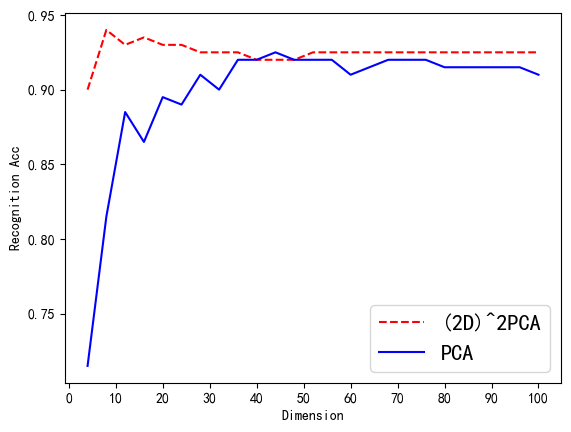

In [21]:
pca_2d2_acc = []
pca_acc = []
X_train, y_train, X_test, y_test = load_images_2d(folder_path)
dimension = [i * 4 for i in range(1, 26)]
# -----------(2D)^2PCA----------
for i in dimension:
    X, Z = PCA2D_2D(X_train, i, i)
    X_train_2d_2dpca = []
    X_test_2d_2dpca = []
    for i in range(len(X_test)):
        res = np.dot(np.dot(np.dot(Z, np.dot(Z.T, X_test[i])), X), X.T)  # 对测试集降维
        X_test_2d_2dpca.append(res)

    for i in range(len(X_train)):
        res = np.dot(np.dot(np.dot(Z, np.dot(Z.T, X_train[i])), X), X.T)  # 对训练集降维
        X_train_2d_2dpca.append(res)
        
    X_train_2d_2dpca = np.array(X_train_2d_2dpca).reshape(200, -1)
    X_test_2d_2dpca = np.array(X_test_2d_2dpca).reshape(200, -1)
    
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train_2d_2dpca, y_train)

    test_pred = knn.predict(X_test_2d_2dpca)
    test_accuracy = accuracy_score(y_test, test_pred)
    pca_2d2_acc.append(test_accuracy)
    
# ------------PCA----------------
for i in dimension:
    X_train, y_train, X_test, y_test = load_images_1d(folder_path)

    pca = PCA(n_components=i)  
    X_train_pca = pca.fit_transform(X_train) # 用训练集训练
    X_test_pca = pca.transform(X_test)  # 测试集降维

    X_train_pca = pca.inverse_transform(X_train_pca)  # 重构
    X_test_pca = pca.inverse_transform(X_test_pca)

    # KNN分类器
    knn = KNeighborsClassifier(n_neighbors = 1)
    knn.fit(X_train_pca, y_train)

    test_pred = knn.predict(X_test_pca)
    test_accuracy = accuracy_score(y_test, test_pred)
    pca_acc.append(test_accuracy)

plt.plot(dimension, pca_2d2_acc, color='r', linestyle='--', label='(2D)^2PCA')
plt.plot(dimension, pca_acc, color='b', linestyle='-', label='PCA')
plt.xticks([i*10 for i in range(0,11)])
plt.xlabel('Dimension')  
plt.ylabel('Recognition Acc') 
plt.legend(loc='lower right', prop={'size': 16})
plt.show() 